# Data Science and Machine Learning - Project "Classification"

## Business Understanding

The LaGoste Stores is a company operating in the fashion, sports and luxury sector. They sell products from 5 major categories: Sneakers, Rackets, T-Shirts, Watches and Hats. These five categories can be also be divided in Premium Brand material and more mainstream articles. The Customers can order and acquire those products through 3 channel groups: Physical stores, quaterly catalogs and the companies’ website. 



## Classification Analysis

The objective of the team is to build a predictive model that will produce the highest profit for the next direct
marketing campaign of the company – the sixth campaign this year that is scheduled for next month. The campaign
aims at selling a new product to the customer database (potential of 250,000 customers).

The team's goal is to develop a model that predicts customer behavior and apply this model to the rest of the
customer base.

The final model predicts a profit of <b>396.440,13€</b> when applied to the 250.000 LaGoste customer universe.

# Index

#### [1. Exploratory Data Analysis](#PART1)
#### [2. Classification](#PART2)

### Imported Libraries

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import time
from datetime import datetime, date, timedelta

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libs
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score 

import warnings
warnings.filterwarnings('ignore')

# Format the libs
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
%matplotlib inline

#### Dataset Variable Description 

| Variable | Description |
| :---        |    :----   | 
| AcceptedCmp1 | Flag indicating customer accepted offer in campaign 1 |
| AcceptedCmp2 | Flag indicating customer accepted offer in campaign 2 |
| AcceptedCmp3 | Flag indicating customer accepted offer in campaign 3 |
| AcceptedCmp4 | Flag indicating customer accepted offer in campaign 4 |
| AcceptedCmp5 | Flag indicating customer accepted offer in campaign 5 |
| Complain | Flag indicating if customer has complained |
| Custid | Customer ID |
| DepVar | Binary variable indicating if customer accepted (1) or not (0) a marketing offer from current campaign. Dependent  variable of the problem.  |
| Dt_Customer | Date of customer's enrolment with the company |
| Education | Level of education of Customer |
| Income | Yearly Income of household of Customer |
| Kidhome|  Number of kids in household |
| Marital_Status | Marital Status of Customer |
| MntSneakers | Amount spent on Sneakers |
| MntRackets | Amount spent on Rackets |
| MntTShirts | Amount spent on Tshirts |
| MntWatches | Amount spent on Watches |
| MntHats | Amount spent on Hats |
| MntPremium_Brand | Amount spent on Premium material |
| NumCatalogPurchases | Number of purchases made through catalog |
| NumStorePurchases | Number of purchases made through store |
| NumDealsPurchases | Number of purchases made with discounts |
| NumWebPurchases | Number of purchases made through web |
| NumWebVisitsMonth | Average number of web visits a month to the company site |
| Recency | Number of days since last purchase |
| Teenhome | Number of teenagers in household |
| Year_Birth | Customer's Year of birth |

 #### Created Variables Description 
 
| Variable | Description |
| :---        |    :----   | 
| Tenure | Tenure years, rounded down |
| Age | Customer age, in years |
| Total_Spending | Total amount spent |
| Income_Spent | Percentage of the income spent |
| Total_Purchases | Number of total purchases |
| Avg_Spent | Average income spent per purchase |
| StorePurchases | Percentage of Store Purchases |
| WebPurchases |  Percentage of Web Purchases|
| CatalogPurchases |  Percentage of Catalog Purchases |
| Deals | Percentage of Deal Purchases |
| Sneakers | Percentage of amount spent in Sneakers |
| Rackets | Percentage of amount spent in Rackets |
| TShirts | Percentage of amount spent in Tshirts |
| Watches | Percentage of amount spent in Watches |
| Hats | Percentage of amount spent in Hats |
| Premium | Percentage of amount spent in Premium Brand |
| Higher_Education | Customer has a higher education degree | 
| Is_Single | Customer is single |
| AcceptedCmpTotal | Total of campaigns that client accepted  |
 



<a id='PART1'></a>

## 1. Exploratoy Data Analysis

Import the dataset and define the index of the dataframe with the column `Custid`.

In [2]:
data = pd.read_excel(r'Group29_LaGoste_Campaign.xlsx')
data.set_index('Custid', inplace=True)

<a id='Describe'></a>
### 1.1 Data Describe

The dataset has 2500 rows, 20 integer variables, 3 float variables, one datetime variable and 2 object class variables.

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2500.0,1971.762400,12.178459,1944.0,1962.0,1973.0,1981.00,1998.0
Income,2471.0,63494.125860,28702.802728,1134.0,41758.0,62618.0,83117.50,195163.0
Kidhome,2500.0,0.439200,0.529920,0.0,0.0,0.0,1.00,2.0
Teenhome,2500.0,0.496000,0.543785,0.0,0.0,0.0,1.00,2.0
Recency,2500.0,49.118000,28.835531,0.0,24.0,49.0,73.00,99.0
MntSneakers,2500.0,305.167600,336.688329,0.0,25.0,177.0,505.25,1492.0
MntTShirts,2500.0,39.352000,57.913495,0.0,3.0,14.0,50.00,296.0
MntRackets,2500.0,273.952000,387.629423,0.0,24.0,107.0,374.00,2548.0
MntWatches,2500.0,24.948000,36.958643,0.0,2.0,8.0,32.00,180.0
MntHats,2461.0,53.086144,79.358448,0.0,4.0,16.0,68.00,398.0


In [4]:
data.describe(include=['O']).T

,count,unique,top,freq
Education,2500,5,Graduation,1212
Marital_Status,2500,5,Married,973


<a id='Missing'></a>
### 1.2 Handling Missing Data

There are 3 variables with missing values: `Income`, `MntHats` and `MntPremium_Brand`. The following table shows the assumptions assumed:

| Variable | Criteria |
| :---        |    :----   | 
| Income | Income's mean, contingent on the customer's education level |
| MntHats | Should the value be missing, an amount of 0.0mu is assumed. |
| MntPremium_Brand | Should the value be missing, an amount of 0.0mu is assumed. |

In [5]:
# Proportion of missing values
data.isna().sum() / len(data)

Year_Birth             0.0000
Education              0.0000
Marital_Status         0.0000
Income                 0.0116
Kidhome                0.0000
Teenhome               0.0000
Dt_Customer            0.0000
Recency                0.0000
MntSneakers            0.0000
MntTShirts             0.0000
MntRackets             0.0000
MntWatches             0.0000
MntHats                0.0156
MntPremium_Brand       0.0184
NumDealsPurchases      0.0000
NumWebPurchases        0.0000
NumCatalogPurchases    0.0000
NumStorePurchases      0.0000
NumWebVisitsMonth      0.0000
AcceptedCmp2           0.0000
AcceptedCmp3           0.0000
AcceptedCmp4           0.0000
AcceptedCmp5           0.0000
AcceptedCmp1           0.0000
Complain               0.0000
DepVar                 0.0000
dtype: float64

In [6]:
# Replace the income's missing values using its mean, contingent on the customer's education level
data['Income'] = data[['Education', 'Income']].groupby('Education').transform(lambda x: x.fillna(x.mean()))
# Replace the MntHats and MntPremium_Brand's missing values with 0.0 mu
data.fillna(0, inplace=True)

<a id='Transformation'></a>
### 1.3 Feature Creation & Transformation

In [7]:
# Creation of the Total_Spending variable: Total amount spent in the company
data['Total_Spending'] = data[['MntSneakers','MntRackets','MntTShirts','MntWatches','MntHats']].sum(axis = 1)

# Creation of the Total_Purchases variable: Total number of purchases
data['Total_Purchases'] = data[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis = 1)

#### Coherence Checking

- Compare total spending to the amount spent on premium material

In [8]:
data[(data['MntPremium_Brand'] > data['Total_Spending']) ]  

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20023327,1990,Basic,Together,16865.0,1,0,2016-06-17,60,0,3,2,4,2.0,12.0,1,5,2,3,6,0,0,0,0,0,0,0,11.0,10


In [9]:
if((data['MntPremium_Brand']>data['Total_Spending']).any()):
    data.loc[data['MntPremium_Brand']>data['Total_Spending'], 'MntPremium_Brand']=data['Total_Spending']

- Compare total purchases to the number of purchases made with discounts

In [10]:
data[(data['NumDealsPurchases'] > data['Total_Purchases'])]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20010855,1977,Graduation,Divorced,3377.000000,1,0,2015-11-22,65,7,1,10,1,2.0,3.0,15,1,0,0,20,0,0,0,0,0,0,0,21.0,1
20011147,1961,Graduation,Married,3699.000000,1,1,2016-06-16,68,3,0,1,1,0.0,2.0,15,0,0,0,20,0,0,0,0,0,0,0,5.0,0
20014003,1952,2n Cycle,Together,6374.000000,0,0,2017-05-01,72,22,3,12,3,9.0,2.0,15,1,0,1,19,0,0,0,1,0,0,0,49.0,2
20016651,1974,2n Cycle,Married,4306.000000,1,0,2016-09-25,52,2,4,6,2,4.0,2.0,15,1,0,0,20,0,0,0,0,0,0,0,18.0,1
20017743,1981,Graduation,Married,3914.000000,1,0,2016-02-17,80,2,2,5,1,2.0,6.0,15,1,0,0,20,0,0,0,0,0,0,0,12.0,1
20022803,1972,PhD,Together,7259.000000,0,1,2016-09-06,81,64,8,36,1,4.0,10.0,15,1,1,1,20,0,0,0,0,0,0,0,113.0,3
20034555,1951,PhD,Together,4585.000000,0,1,2016-03-29,19,24,0,4,0,0.0,2.0,15,1,0,1,20,0,0,0,0,0,0,0,28.0,2
20034587,1981,PhD,Married,10150.000000,0,0,2016-03-29,86,111,6,120,8,4.0,6.0,15,1,1,1,19,0,0,1,1,0,0,0,249.0,3
20040867,1988,Basic,Together,52913.996528,0,0,2016-09-13,53,1,1,5,1,3.0,3.0,15,1,0,0,20,0,0,0,0,0,0,0,11.0,1


In [11]:
if((data['NumDealsPurchases']>data['Total_Purchases']).any()):
    data.loc[data['NumDealsPurchases']>data['Total_Purchases'], 'NumDealsPurchases']=data['Total_Purchases']

- Find cases where the total amount spent is positive but there are no purchases. In this cases we assume that was one purchase in web channel, given its the channel with the highest number of purchases

In [12]:
data[((data['Total_Spending']>0 ) & (data['Total_Purchases']==0))]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20011147,1961,Graduation,Married,3699.0,1,1,2016-06-16,68,3,0,1,1,0.0,2.0,0,0,0,0,20,0,0,0,0,0,0,0,5.0,0
20034115,1968,Basic,Divorced,186126.0,0,0,2016-11-02,29,1,0,2,1,2.0,2.0,0,0,0,0,1,0,0,0,0,0,0,0,6.0,0
20035187,1987,Graduation,Single,2785.0,0,0,2016-05-10,82,2,1,3,0,1.0,1.0,0,0,0,0,19,0,0,0,0,0,0,0,7.0,0
20040651,1962,Graduation,Married,6377.0,0,1,2016-10-04,57,2,0,1,0,0.0,1.0,0,0,0,0,20,0,0,0,0,0,0,0,3.0,0


In [13]:
print(data[['NumWebPurchases']].sum(axis = 0))
print(data[['NumStorePurchases']].sum(axis = 0))
print(data[['NumCatalogPurchases']].sum(axis = 0))

NumWebPurchases    19899
dtype: int64
NumStorePurchases    16937
dtype: int64
NumCatalogPurchases    11948
dtype: int64


In [14]:
if((data['Total_Spending']>0).any() & (data['Total_Purchases']==0).any()):
    data.loc[(data['Total_Spending']>0) & (data['Total_Purchases']==0), 'Total_Purchases']=1
    data.loc[(data['Total_Spending']>0) & (data['Total_Purchases']==0), 'NumWebPurchases']=1

- Analyze cases where the web purchase amount is greater than zero, but there are no web purchases. This is fine because the number of monthly web visits is a monthly average.

In [15]:
# Analyze cases where the web purchase amount is not zero, but the number of web purchases is
data[(data['NumWebPurchases'] > 0) & (data['NumWebVisitsMonth'] == 0)]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntSneakers,MntTShirts,MntRackets,MntWatches,MntHats,MntPremium_Brand,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,Complain,DepVar,Total_Spending,Total_Purchases
Custid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20007103,1976,2n Cycle,Married,92570.0,0,0,2016-09-25,19,190,29,327,31,360.0,297.0,1,6,6,9,0,0,0,0,0,0,0,0,937.0,21
20011463,1986,Graduation,Married,194482.0,0,0,2016-10-30,41,55,14,67,18,5.0,4.0,0,1,1,1,0,0,0,1,1,0,0,0,159.0,3
20013339,1984,Graduation,Single,9312.0,0,0,2016-10-01,53,120,5,43,9,14.0,5.0,15,1,26,1,0,0,0,1,0,0,0,0,191.0,28
20014127,1988,Master,Single,82416.0,0,0,2016-12-12,47,221,24,405,15,32.0,7.0,1,5,5,14,0,0,0,0,0,0,0,0,697.0,24
20015323,1975,2n Cycle,Married,7509.0,0,1,2017-04-07,99,37,3,2522,6,7.0,8.0,15,1,26,1,0,0,0,0,1,0,0,0,2575.0,28
20015423,1954,Graduation,Single,194400.0,0,0,2015-12-28,45,27,29,81,3,24.0,11.0,0,1,1,1,0,0,0,0,0,0,0,0,164.0,3
20016391,1952,Master,Married,193329.0,0,1,2017-06-26,63,23,3,2473,2,3.0,2.0,15,1,26,1,0,0,0,0,0,0,0,0,2504.0,28
20016459,1967,Graduation,Married,84762.0,0,0,2017-01-30,63,185,81,615,70,92.0,221.0,1,6,5,7,0,0,0,0,0,0,0,0,1043.0,18
20017023,1986,Graduation,Single,195163.0,0,0,2017-04-21,35,36,23,129,2,21.0,12.0,0,1,1,1,0,0,0,0,0,0,0,0,211.0,3


#### Date related variables

In [16]:
# Creation of the Tenure variable: Tenure's Age
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Tenure'] = (datetime.now() - data['Dt_Customer']) / timedelta(days=365)
data['Tenure'].apply(np.floor)

# Creation of the Age variable: Customer's Age
data['Age']=date.today().year- data['Year_Birth']

#### Income related variables

In [17]:
# Creation of the Income_Spent variable: Proportion of the income spent per customer
data['Income_Spent'] = data['Total_Spending'] / data['Income']

# Creation of the Avg_Spent variable: Average of the amount spent
data['Avg_Spent'] = data['Total_Spending'] / data['Total_Purchases']

#### Categorical Variables

In [18]:
# Creation of features related with dependents (Kids and Teens)
data['Has_Kidhome'] = np.where((data['Kidhome']>=1),1,0)                          # has at least one kid
data['Has_Teenhome'] = np.where((data['Teenhome']>=1),1,0)                        # has at least one teen
data['Has_Dependant'] = data[['Has_Kidhome','Has_Teenhome']].values.max(axis=1)   # has at least one kid or teen

# Creation of features related with Education
data['Higher_Education'] = np.where(np.isin(data.Education, ['Graduation', 'Master', 'PhD']), 1, 0)
data['Education'] = data['Education'].astype('category')

# Creation of features related with Marital_Status
data['Is_Single'] = np.where(np.isin(data.Marital_Status, ['Single', 'Widow', 'Divorced']), 1, 0)
data['Marital_Status'] = data['Marital_Status'].astype('category')

#### Purchases related variables

Amounts and number of purchases as relative measures

In [19]:
data['WebPurchases'] = data['NumWebPurchases'] / data['Total_Purchases']
data['StorePurchases'] = data['NumStorePurchases'] / data['Total_Purchases']
data['CatalogPurchases'] = data['NumCatalogPurchases'] / data['Total_Purchases']
data['Deals'] = data['NumDealsPurchases'] / data['Total_Purchases']

data['Sneakers'] = data['MntSneakers'] / data['Total_Spending']
data['Rackets'] = data['MntRackets'] / data['Total_Spending']
data['TShirts'] = data['MntTShirts'] / data['Total_Spending']
data['Watches'] = data['MntWatches'] / data['Total_Spending']
data['Hats'] = data['MntHats'] / data['Total_Spending']
data['Premium'] = data['MntPremium_Brand'] / data['Total_Spending']

#### Created Variables Description

| Variable | Description |
| :---        |    :----   | 
| Tenure | Tenure years, rounded down |
| Age | Customer age, in years |
| Total_Spending | Total amount spent |
| Income_Spent | Percentage of the income spent |
| Total_Purchases | Number of total purchases |
| Avg_Spent | Average income spent per purchase |
| StorePurchases | Percentage of Store Purchases |
| WebPurchases |  Percentage of Web Purchases|
| CatalogPurchases |  Percentage of Catalog Purchases |
| Deals | Percentage of Deal Purchases |
| Sneakers | Percentage of amount spent in Sneakers |
| Rackets | Percentage of amount spent in Rackets |
| TShirts | Percentage of amount spent in Tshirts |
| Watches | Percentage of amount spent in Watches |
| Hats | Percentage of amount spent in Hats |
| Premium | Percentage of amount spent in Premium Brand |
| Higher_Education | Customer has a higher education degree | 
| Is_Single | Customer is single |



<a id='Graphical'></a>
### 1.4 Graphical Analysis

Graphical analysis between numerical and categorical variables.

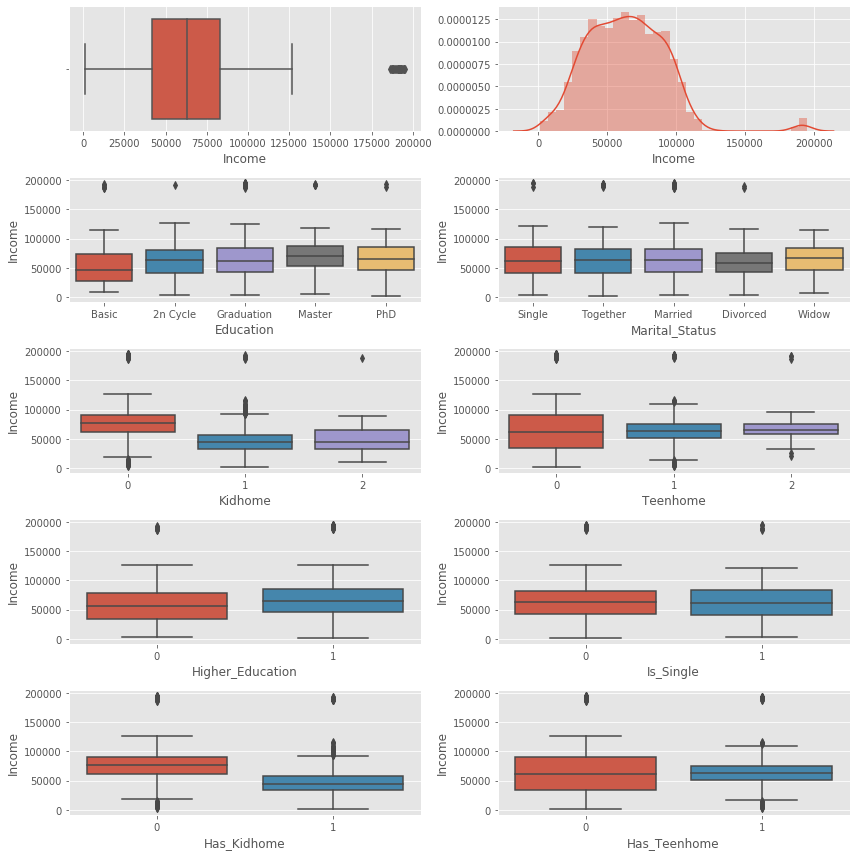

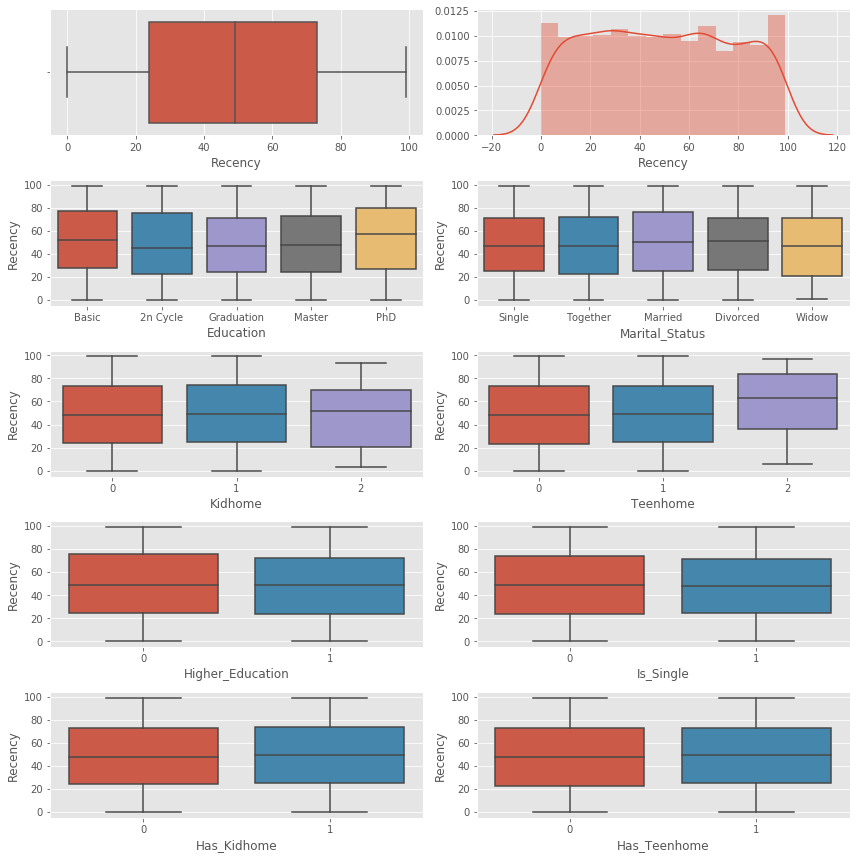

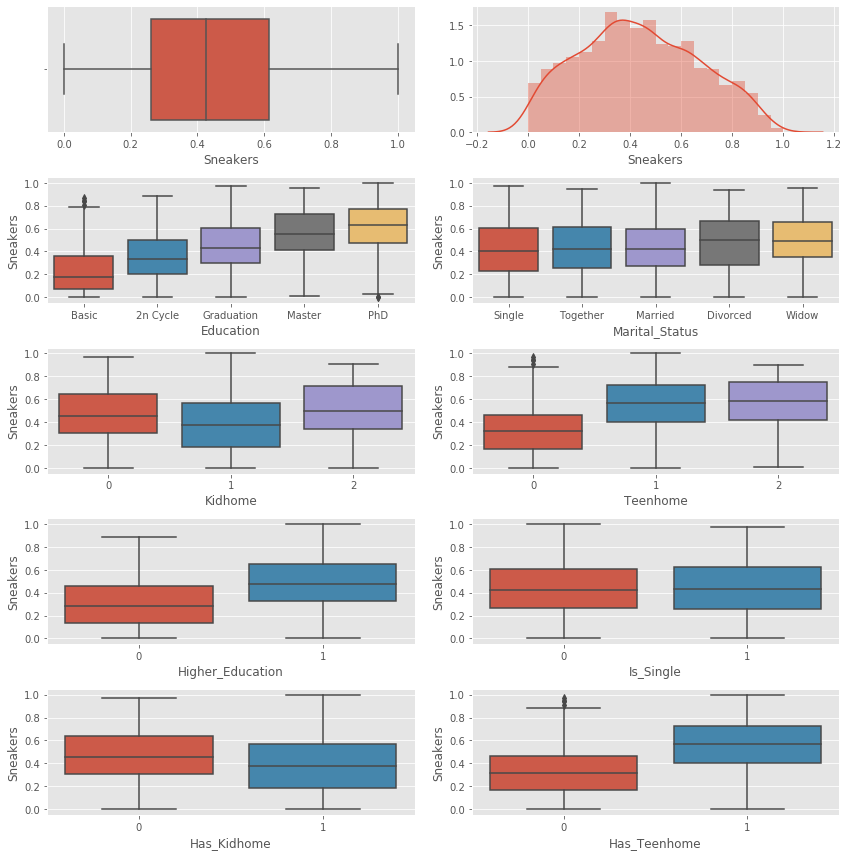

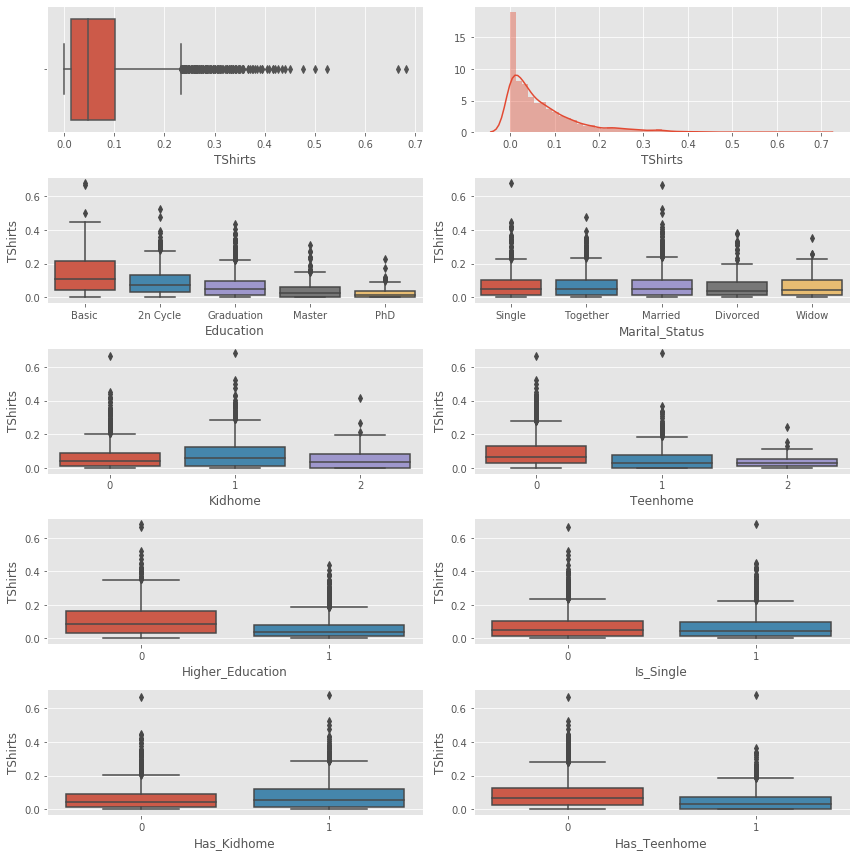

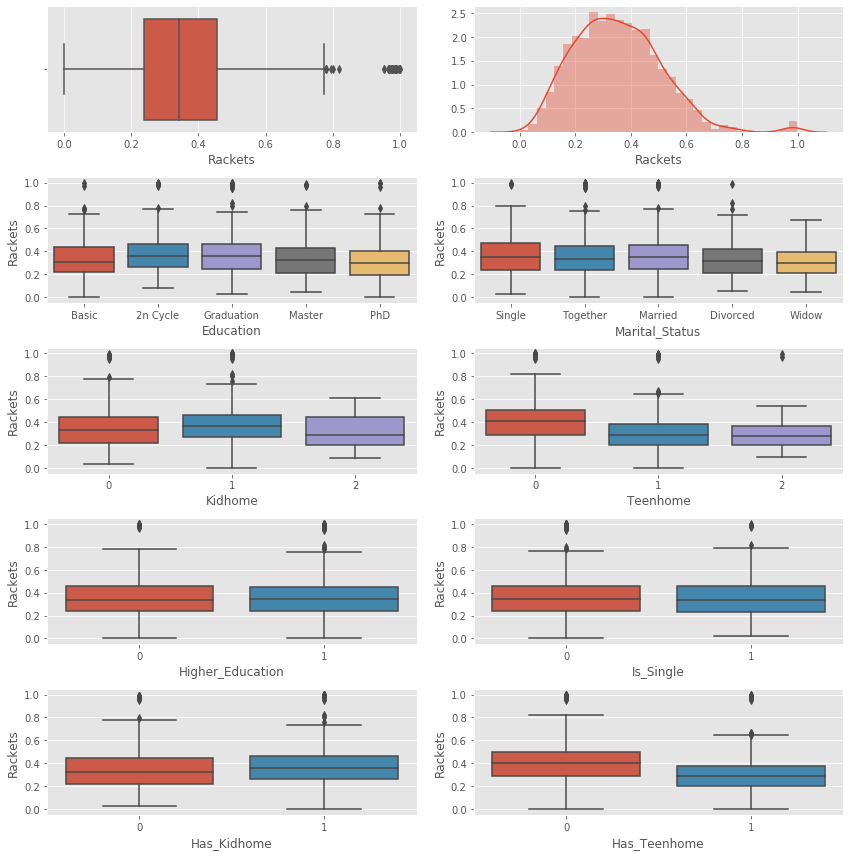

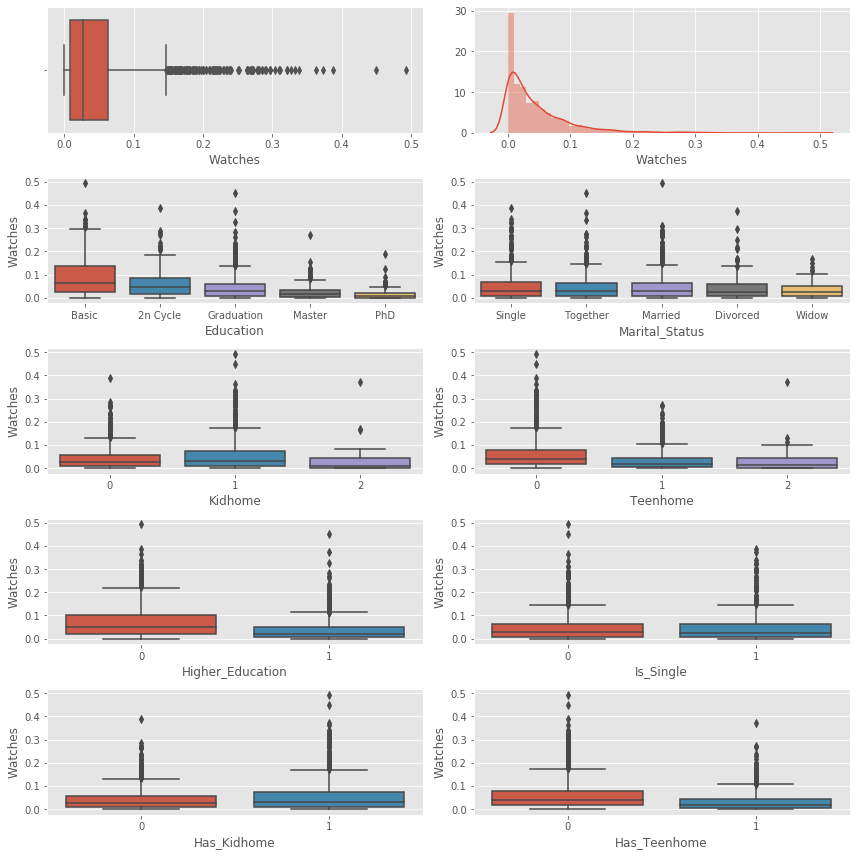

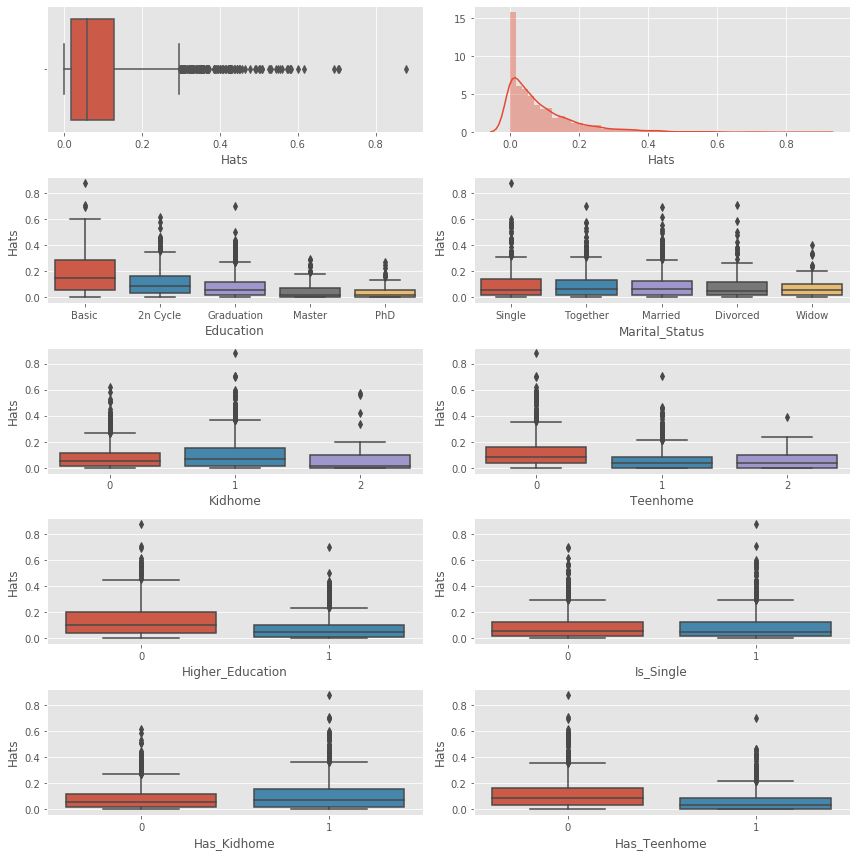

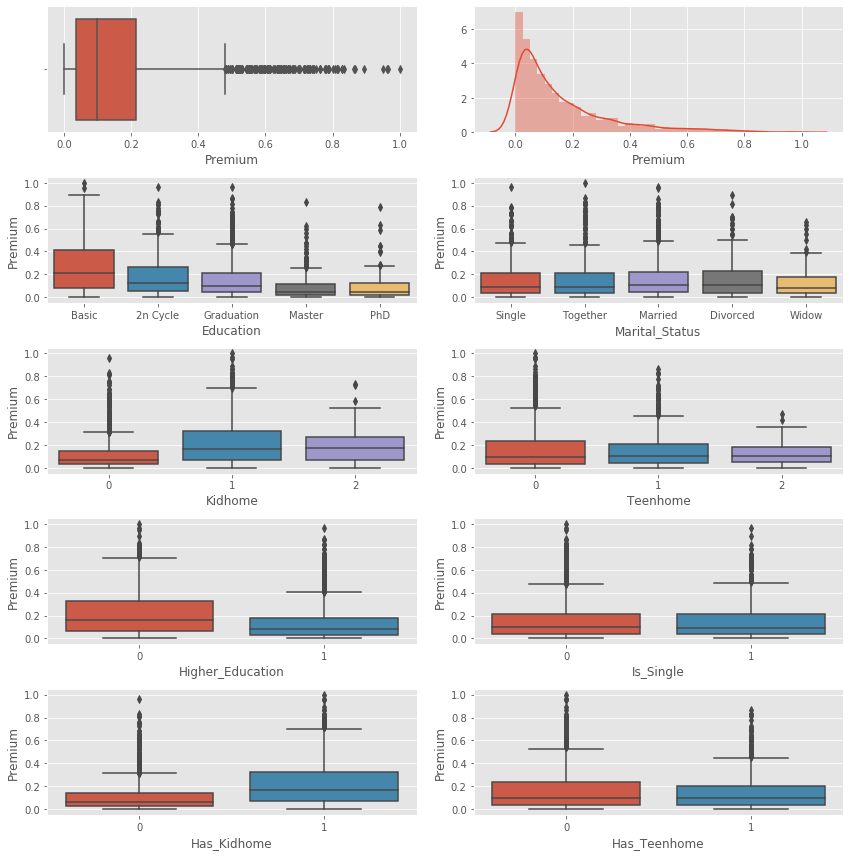

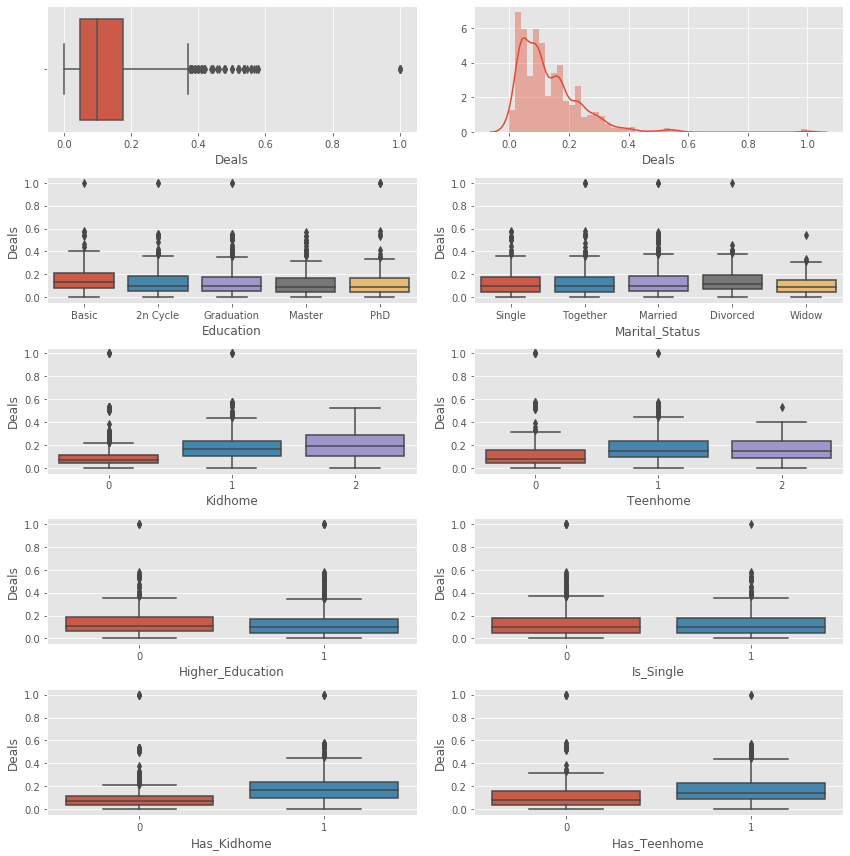

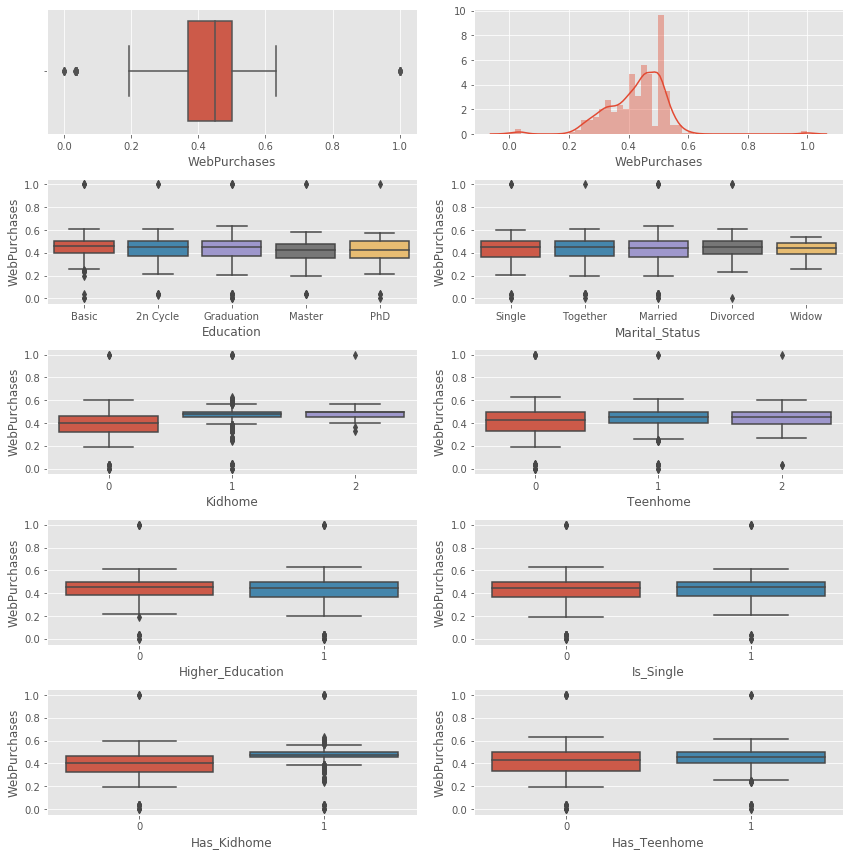

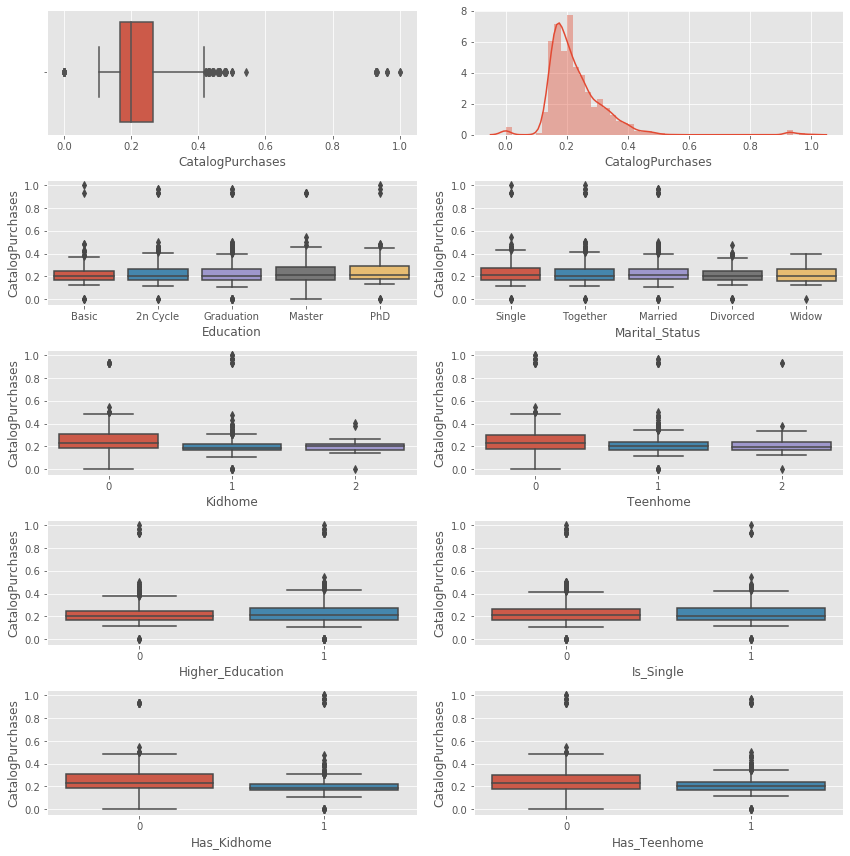

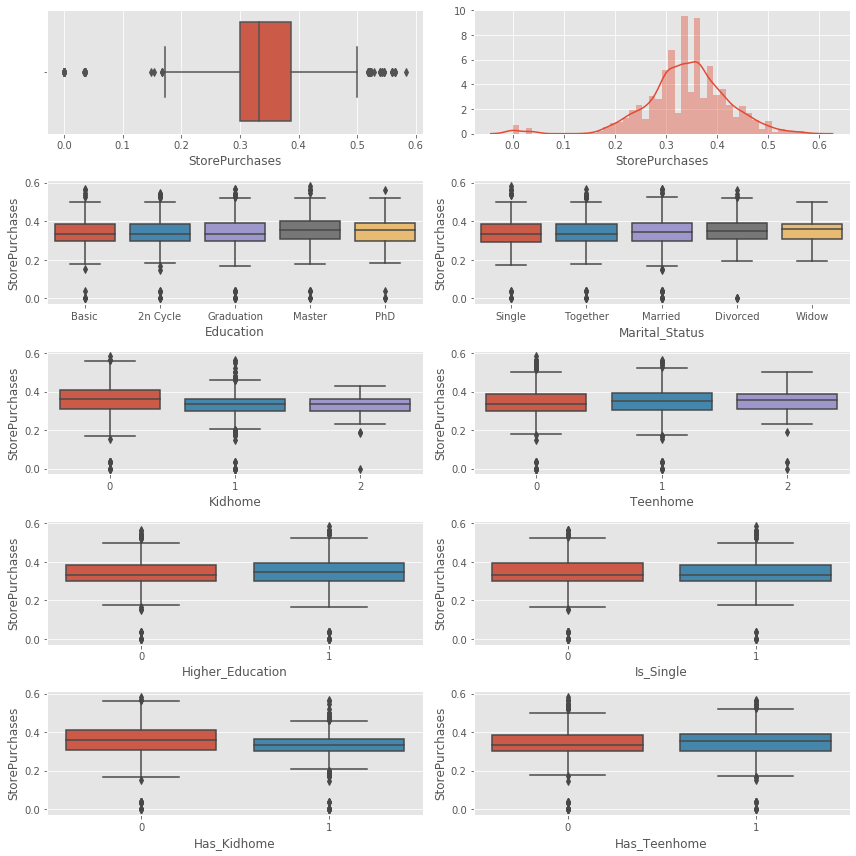

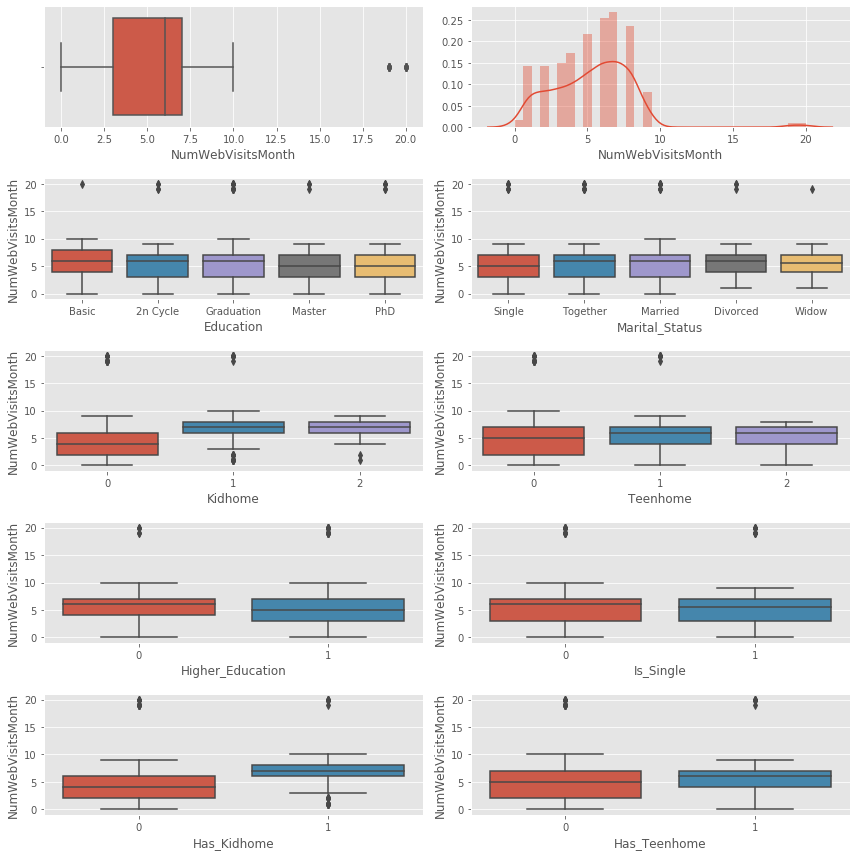

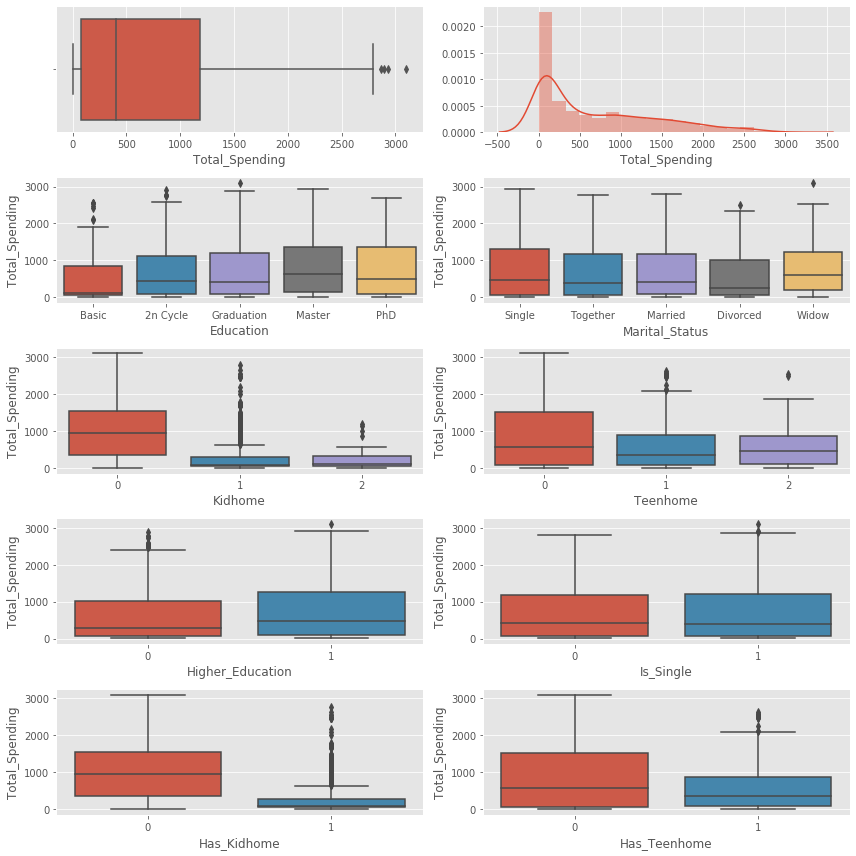

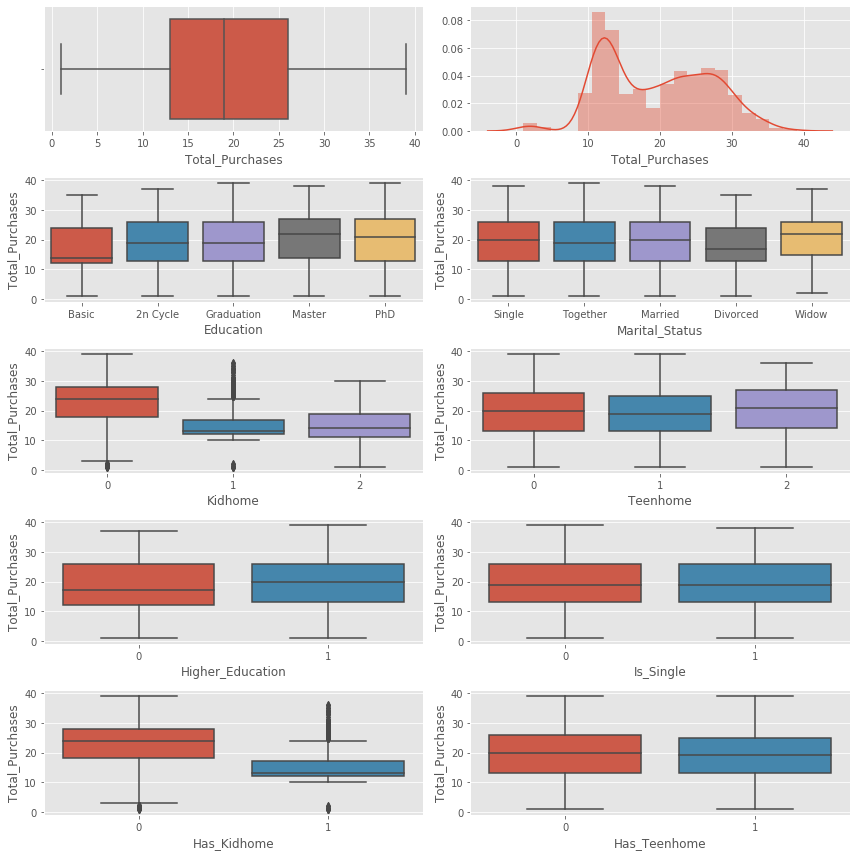

In [20]:
variables = ['Income'
             ,'Recency'
             ,'Sneakers'
             ,'TShirts'
             ,'Rackets'
             ,'Watches'
             ,'Hats'
             ,'Premium'
             ,'Deals'
             ,'WebPurchases'
             ,'CatalogPurchases'
             ,'StorePurchases'
             ,'NumWebVisitsMonth'
             ,'Total_Spending'
             ,'Total_Purchases'
             ]

for var in variables:
    fig, ax = plt.subplots(5, 2, figsize=(12,12))

    sns.boxplot(x=var, data = data, ax = ax[0][0])
    sns.distplot(data[var], ax = ax[0][1])
    sns.boxplot(x=data['Education'], y=data[var], order=['Basic','2n Cycle','Graduation','Master','PhD'], ax = ax[1][0])
    sns.boxplot(x=data['Marital_Status'], y=data[var], order=['Single','Together','Married','Divorced','Widow'], ax = ax[1][1])
    sns.boxplot(x=data['Kidhome'], y=data[var], ax = ax[2][0])
    sns.boxplot(x=data['Teenhome'], y=data[var], ax = ax[2][1])
    
    sns.boxplot(x=data['Higher_Education'], y=data[var], ax = ax[3][0])
    sns.boxplot(x=data['Is_Single'], y=data[var], ax = ax[3][1])
    sns.boxplot(x=data['Has_Kidhome'], y=data[var], ax = ax[4][0])
    sns.boxplot(x=data['Has_Teenhome'], y=data[var], ax = ax[4][1])

    plt.tight_layout()
    plt.show()

Histogram of purchases variables: `NumDealsPurchases`,`NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.

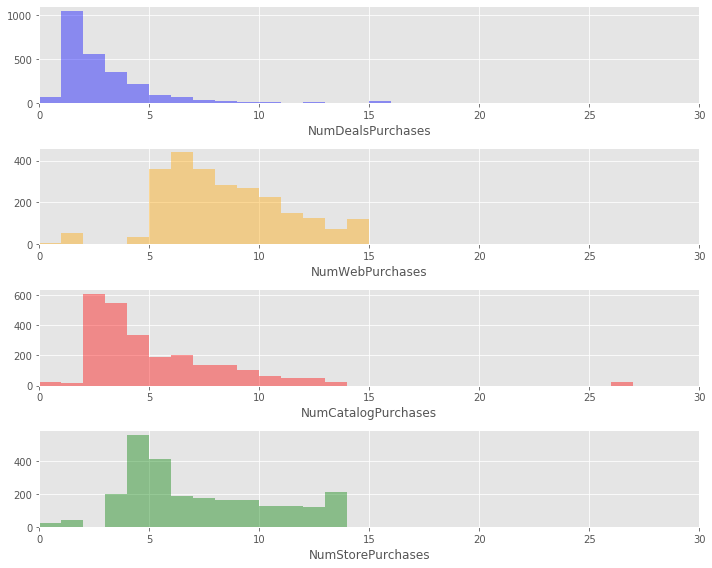

In [21]:
columns = ['NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
colors = ['blue','orange', 'red', 'green']
bin_count = [16,15,27,14]

fig, axs = plt.subplots(4, figsize=(10,8))

for i, column in enumerate(columns):
    sns.distplot(data[column], kde=False, label = column, ax = axs[i], color = colors[i], bins = bin_count[i])
    axs[i].set_xlim(0, 30)

plt.tight_layout()

<a id='Outliers'></a>
### 1.5 Outliers

Considering the exploratory data analysis, we identified the following variables containing potential outliers:
- Income
- T-Shirt
- Rackets
- Hats
- Watches
- Premium
- Deals
- WebPurchases
- CatalogPurchases
- NumWebVisits

Despite this analysis, we only handled outliers in the `Income` variable, as altering the other variables would result in a decrease in cluster performance.

#### Income

In [22]:
len(data[data['Income'] > 175000])

28

[0.01840905]
-473.06800577231184


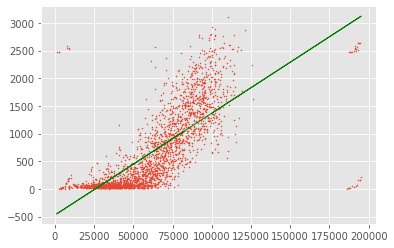

In [23]:
regr = LinearRegression()

x = data['Income'].values.reshape(-1, 1)
regr.fit(x, data['Total_Spending'])
y_pred = regr.predict(x)

plt.scatter(x, data['Total_Spending'], s =1)
plt.plot(x, y_pred, linewidth = 1, c = 'g')
print(regr.coef_)
print(regr.intercept_)

[0.02198449]
-677.2306015912469


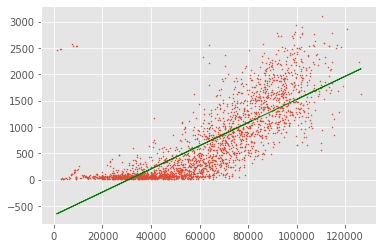

In [24]:
regr = LinearRegression()

subset = data[data['Income'] < 175000]
x = subset['Income'].values.reshape(-1, 1)

regr.fit(x, subset['Total_Spending'])
y_pred = regr.predict(x)
plt.scatter(x, subset['Total_Spending'], s =1)
plt.plot(x, y_pred, linewidth = 1, c = 'g')
print(regr.coef_)
print(regr.intercept_)

The regression suggests a high influence of outliers hence, we have to deal with them.

In [25]:
# We opt for removing the 26 cases given their small number of observations and pottential high impact
data = data[data['Income'] < 175000]

Graphical analysis between `Income` (without outliers) and categorical variables.

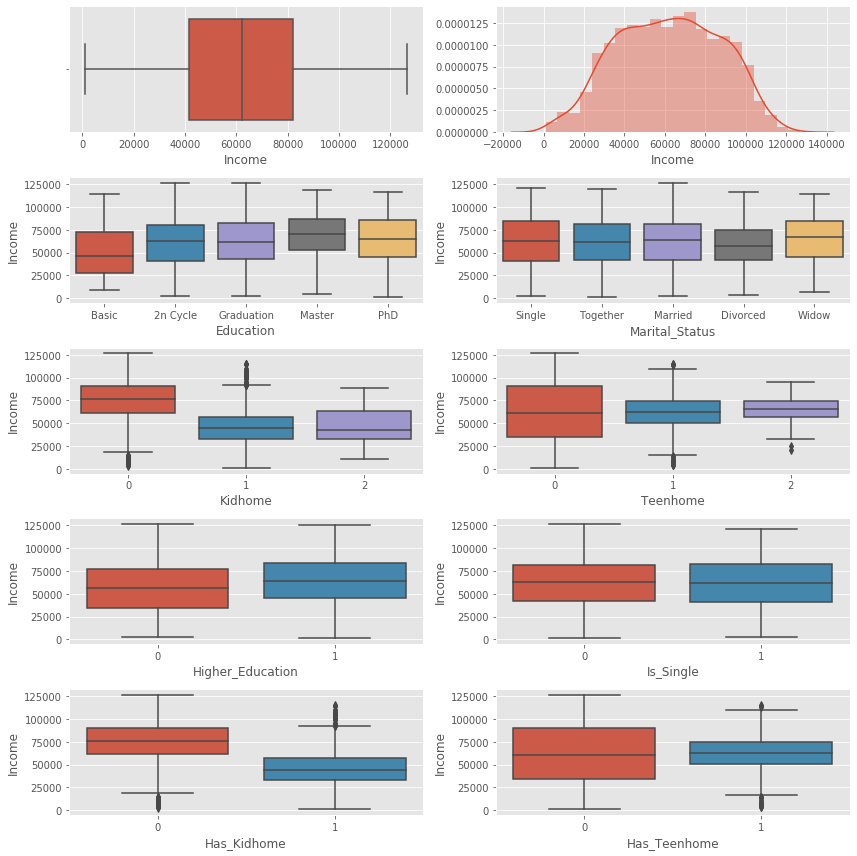

In [26]:
variables = ['Income']

for var in variables:
    fig, ax = plt.subplots(5, 2, figsize=(12,12))

    sns.boxplot(x=var, data = data, ax = ax[0][0])
    sns.distplot(data[var], ax = ax[0][1])
    sns.boxplot(x=data['Education'], y=data[var], order=['Basic','2n Cycle','Graduation','Master','PhD'], ax = ax[1][0])
    sns.boxplot(x=data['Marital_Status'], y=data[var], order=['Single','Together','Married','Divorced','Widow'], ax = ax[1][1])
    sns.boxplot(x=data['Kidhome'], y=data[var], ax = ax[2][0])
    sns.boxplot(x=data['Teenhome'], y=data[var], ax = ax[2][1])
    
    sns.boxplot(x=data['Higher_Education'], y=data[var], ax = ax[3][0])
    sns.boxplot(x=data['Is_Single'], y=data[var], ax = ax[3][1])
    sns.boxplot(x=data['Has_Kidhome'], y=data[var], ax = ax[4][0])
    sns.boxplot(x=data['Has_Teenhome'], y=data[var], ax = ax[4][1])

    plt.tight_layout()
    plt.show()

<a id='Correlations'></a>
### 1.6 Correlations

In this section we study the correlation between the variables of our transformed dataset.

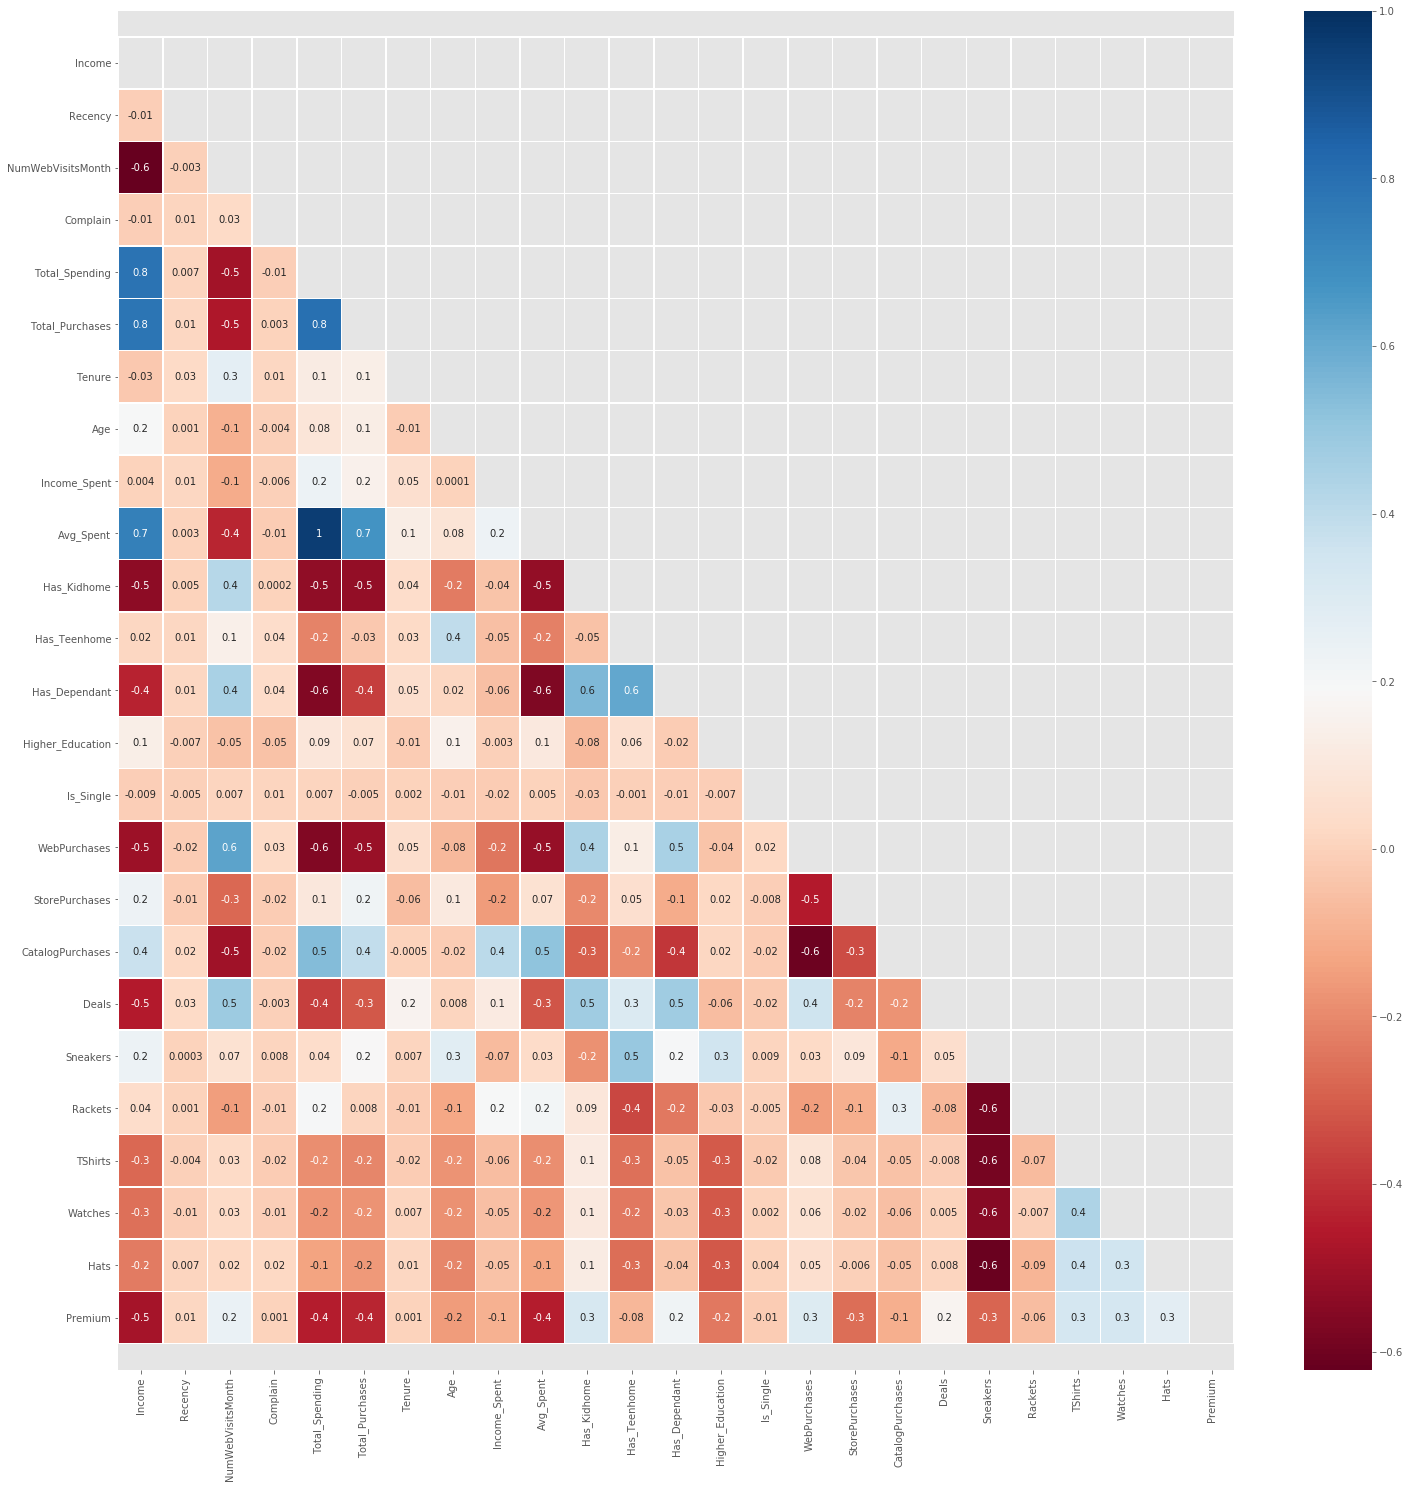

In [27]:
data_corr=data.drop(['Year_Birth','Kidhome','Teenhome',
                     'AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','DepVar',
                     'MntSneakers','MntRackets','MntTShirts','MntWatches','MntHats','MntPremium_Brand',
                     'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'], axis=1)

plt.figure(figsize = (25,25))
mask = np.tril(data_corr.corr()).T
coor_plot=sns.heatmap(data_corr.corr(), annot=True, fmt='.1g', linewidths=.5,mask=mask, cmap='RdBu')

b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t) 
plt.show()

Notes:
No strong correlations (>.5) have been identified, apart from the expected aggregators:
- A linear relationship between Total_Spending, Total_Purchases, Avg_Spent and its contituents

<a id='PART2'></a>

# 2. Classification

##### Dependent variable of the problem: variable indicating if customer accepted (1) or not (0) a marketing offer from current campaign. 

In [28]:
instance_count: pd.DataFrame = data['DepVar'].value_counts()
    
print('Campaign not accepted: ', round(instance_count[0]/len(data), 2))
print('Campaign accepted: : ', round(instance_count[1]/len(data), 2))

Campaign not accepted:  0.88
Campaign accepted: :  0.12


### 2.1 Feature Engineering

Most of the feature engineering took place in the first part of this assingment. In this section we only created one additional feature which corresponds to the total number of accepted campaigns per customer.

In [29]:
# Total of campaigns that client accepted (AcceptedCmpTotal)
campaign_columns = [c for c in data.columns if 'AcceptedCmp' in c]
data['AcceptedCmpTotal'] = data[campaign_columns].sum(axis=1)
data.drop(campaign_columns, axis=1, inplace=True)

### 2.2 Correlation Matrix

Remove features that contains similar information:

In [30]:
data.drop(['Year_Birth','Dt_Customer','Kidhome','Teenhome',"MntSneakers","MntTShirts","MntRackets","MntWatches","MntHats",
           "MntPremium_Brand","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases",
           "NumWebVisitsMonth",'Education','Has_Kidhome','Has_Teenhome','Marital_Status', 'Total_Spending'
          ], axis=1, inplace=True)

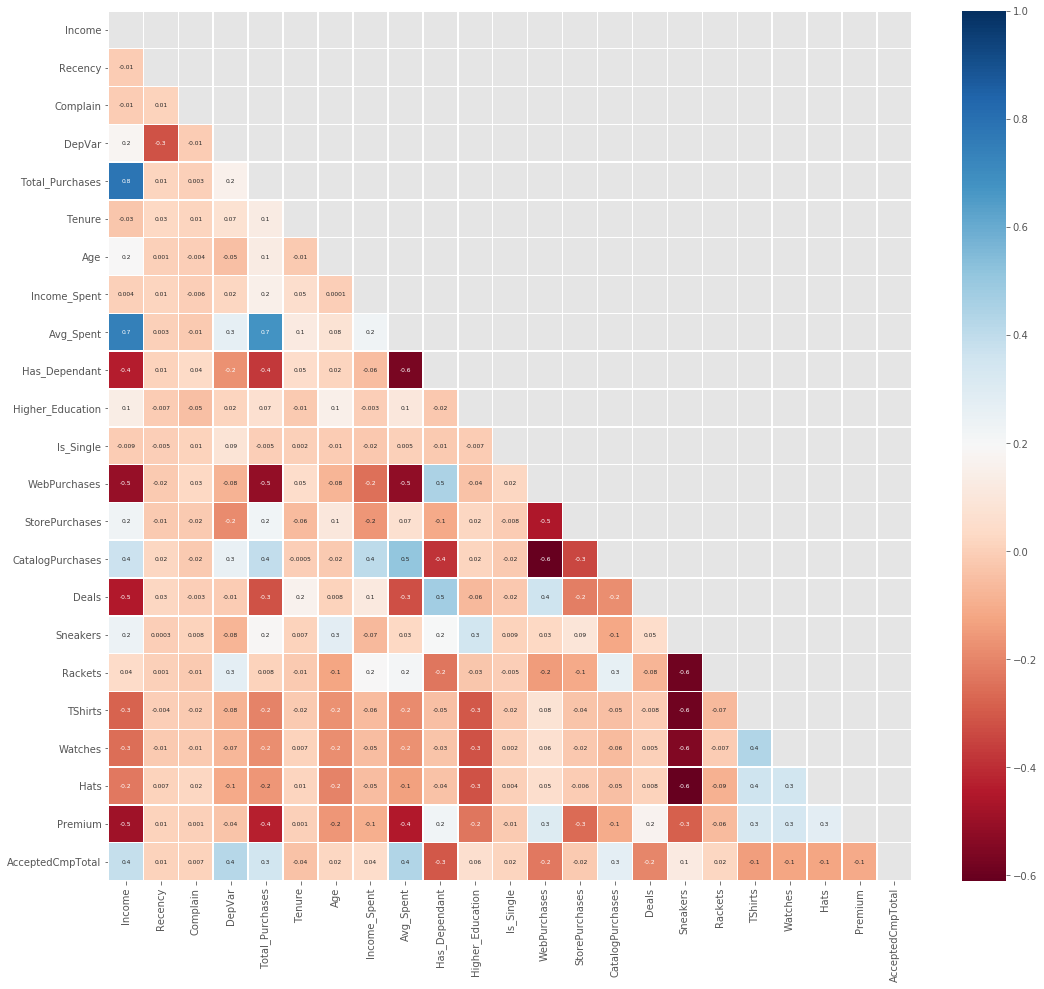

In [31]:
plt.figure(figsize = (18,16))
mask = np.tril(data.corr()).T
corr= sns.heatmap(data.corr(), annot=True, fmt='.1g', linewidths=.5,mask=mask, cmap='RdBu', annot_kws={"size":6})
plt.show()

No strong correlations have been identified, apart from the expected aggregators like `Total_Purchases`, `Avg_Spent` and its contituents.

### 2.3 Target Analysis

An extensive analysis was done in order to identify variables with potentialy high explanatory value to predict if a customer accepted, or not, the campaign. Features such as `Income` and `Recency` seems to have a relevant imprtance to descriminate our dependent variable, `DepVar` .

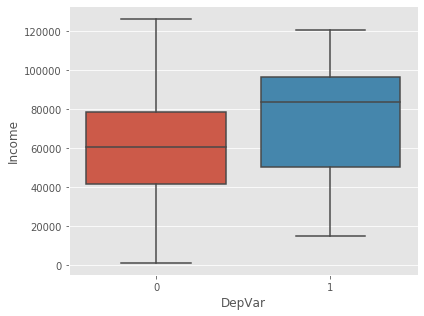

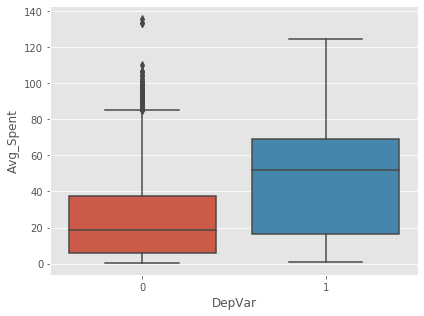

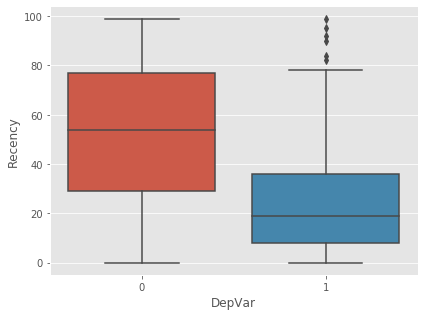

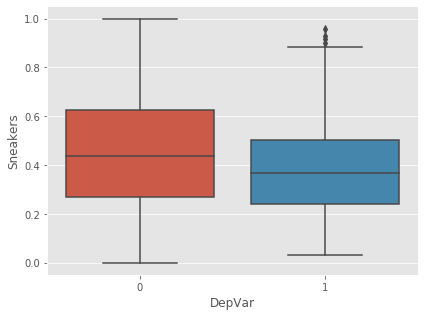

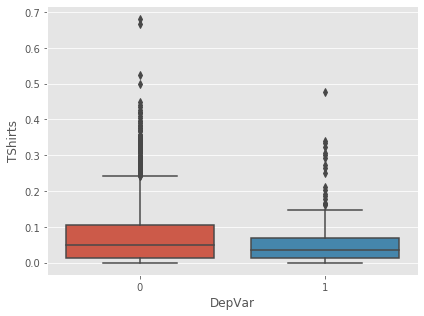

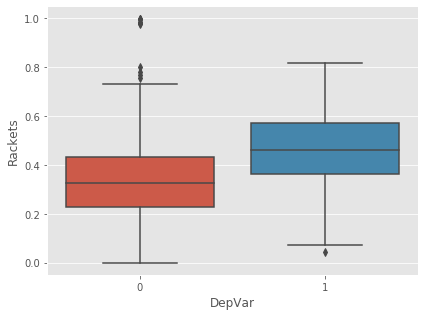

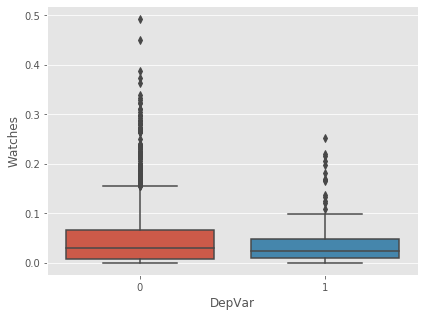

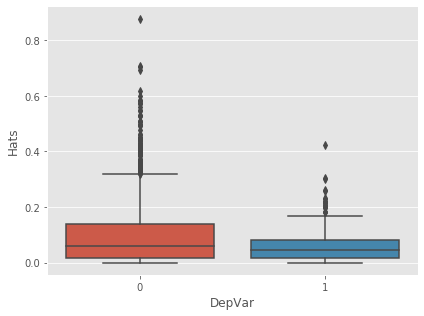

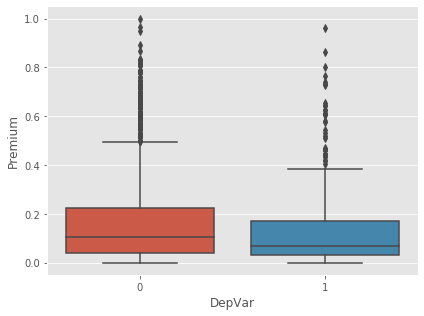

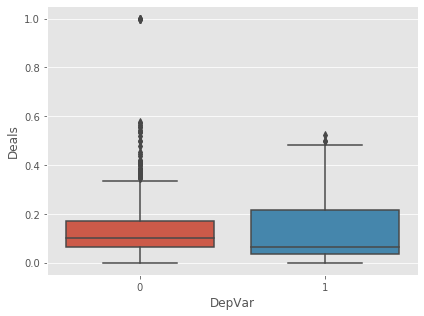

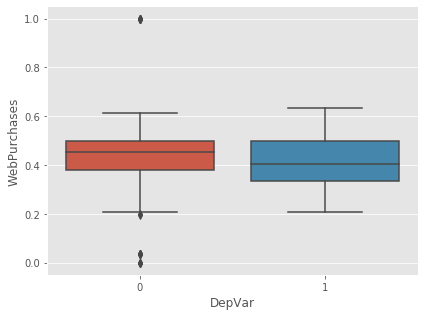

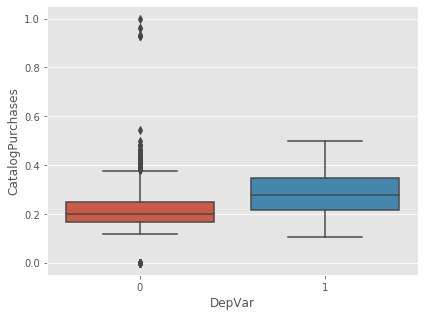

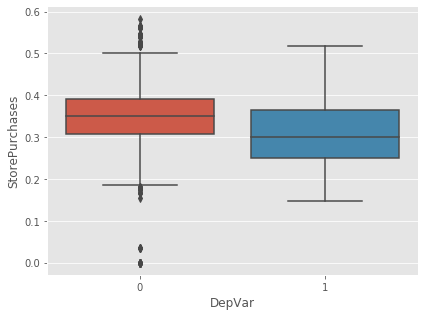

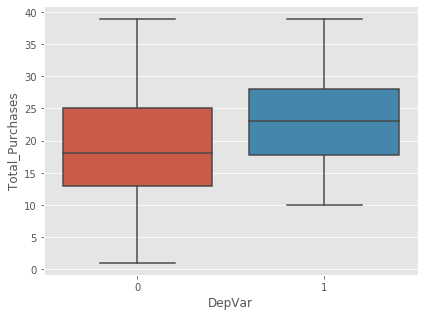

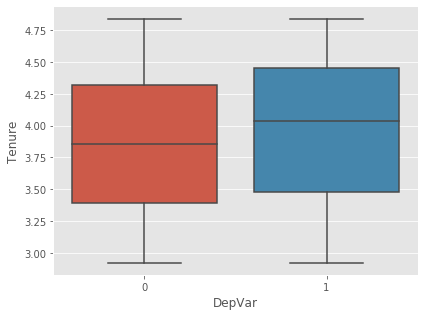

In [32]:
variables = ['Income'
             ,'Avg_Spent'
             ,'Recency'
             ,'Sneakers'
             ,'TShirts'
             ,'Rackets'
             ,'Watches'
             ,'Hats'
             ,'Premium'
             ,'Deals'
             ,'WebPurchases'
             ,'CatalogPurchases'
             ,'StorePurchases'
             ,'Total_Purchases'
             ,'Tenure'             
             ]

for var in variables:
    fig, ax = plt.subplots(figsize = (6, 4.5))
    sns.boxplot(x=data['DepVar'], y=data[var])

    plt.tight_layout()
    plt.show()

### 2.4 Feature Selection

Split the dataset into train and test subsets, using a 70% train size, and defining dependent and independents variables.

In [33]:
y: pd.Series = data['DepVar']
x: pd.Series = data.drop(['DepVar'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 40, stratify = y)

y_train: pd.DataFrame = pd.DataFrame(y_train.values.reshape(-1, 1)).rename(columns={'0': 'y'})
y_test: pd.DataFrame = pd.DataFrame(y_test.values.reshape(-1, 1)).rename(columns={'0': 'y'})

#### RFE

Use Recursive Feature Extraction to select relevant variables. The process works by iteratively removing features and assessing its impact on the model's score. At each recurrent step the less important feature is removed, effectively pruning the model until only a pre-determined number of features is left.

In [34]:
#no of features
nof_list=np.arange(1,20)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)   
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 18
Score with 18 features: 0.933962


In [35]:
model = LogisticRegression(n_jobs=-1)
rfe = RFE(estimator = model, n_features_to_select = nof)
X_rfe = rfe.fit_transform(X = x, y = y) 
model.fit(X = X_rfe,y = y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
rfe.ranking_
rfe.support_

selected_features = pd.Series(rfe.support_, index = x.columns)
selected_features

Income              False
Recency              True
Complain             True
Total_Purchases     False
Tenure               True
Age                 False
Income_Spent         True
Avg_Spent           False
Has_Dependant        True
Higher_Education     True
Is_Single            True
WebPurchases         True
StorePurchases       True
CatalogPurchases     True
Deals                True
Sneakers             True
Rackets              True
TShirts              True
Watches              True
Hats                 True
Premium              True
AcceptedCmpTotal     True
dtype: bool

#### Decision Tree

Additionally, a decison tree was used to determine the feature importance. This information was combined with the RFE results using features which were selected by either methods.

In [37]:
gini_importance = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)

In [38]:
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

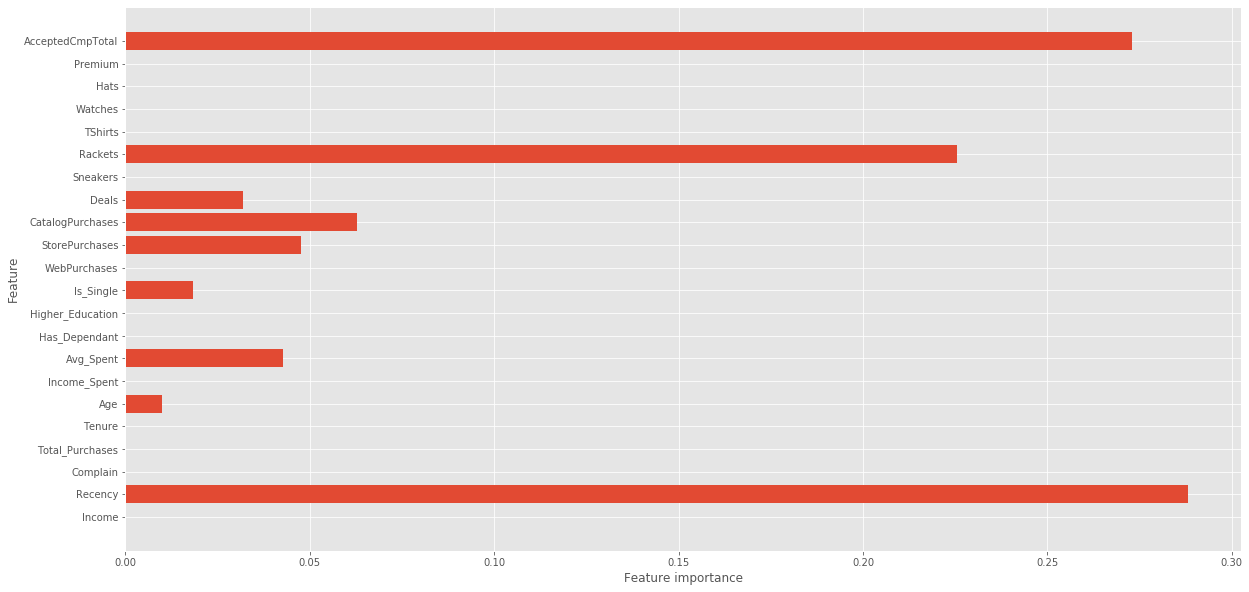

In [39]:
plot_feature_importances(gini_importance)

Remove the variables not significant on both RFE and Decision Tree to the model

In [40]:
data_selection=data.drop(['Income', 'Total_Purchases', 'Higher_Education'], axis=1).copy()

### 2.5 Normalization

In [41]:
#Normalize Recency and Avg_Spent
scaler = MinMaxScaler()
data_selection[['Recency', 'Avg_Spent']] =  \
    scaler.fit_transform(data_selection[['Recency', 'Avg_Spent']])

### 2.6 Grid Search

For this predictive model we choose 7 models to be evaluated in the dataset, selecting that which yields the highest performance: Logistic Classifier, Decision Tree, Random Forest, Gradient Boosting, Neural Networks, KNeibghors and Support Vector Machine.

#### Train test split
Split the dataset into train and test subsets, using a 70% train size, and defining dependent and independents variables.

In [42]:
y: pd.Series = data_selection['DepVar']
x: pd.Series = data_selection.drop(['DepVar'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state= 40, stratify = y)

y_train: pd.DataFrame = pd.DataFrame(y_train.values.reshape(-1, 1)).rename(columns={'0': 'y'})
y_test: pd.DataFrame = pd.DataFrame(y_test.values.reshape(-1, 1)).rename(columns={'0': 'y'})

#### 2.6.1 Logistic Regression

In [43]:
lr=LogisticRegression(random_state=1)

param_grid = dict(fit_intercept=[True,False],penalty=["l1","l2"])

grid_lr=GridSearchCV(lr, param_grid, cv=10, n_jobs=-1)

grid_lr.fit(x_train,y_train)

print("Logistic Regression grid.best_params_: {}".format(grid_lr.best_params_))
print("Logistic Regression grid.best_estimator_: {}".format(grid_lr.best_estimator_))

model_lr = grid_lr.best_estimator_

Logistic Regression grid.best_params_: {'fit_intercept': False, 'penalty': 'l2'}
Logistic Regression grid.best_estimator_: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


#### 2.6.2 Decision Tree

In [44]:
dt= DecisionTreeClassifier(random_state=1)

param_grid = dict( max_depth=[4,6,8],min_samples_split=[50,100,200])

grid_dt=GridSearchCV(dt, param_grid, cv=10, n_jobs=-1)

grid_dt.fit(x_train,y_train)

print("Decision Tree grid.best_params_ {}".format(grid_dt.best_params_))
print("Decision Tree grid.best_estimator_ {}".format(grid_dt.best_estimator_))

model_dt = grid_dt.best_estimator_

Decision Tree grid.best_params_ {'max_depth': 4, 'min_samples_split': 50}
Decision Tree grid.best_estimator_ DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


#### 2.6.3 Random Forest

In [45]:
rf= RandomForestClassifier(random_state=1)

param_grid = dict(n_estimators=[20,50,100], max_depth=[4,6,8], min_samples_split=[50,100,200])

grid_rf=GridSearchCV(rf, param_grid, cv=10, n_jobs=-1)

grid_rf.fit(x_train,y_train)

print("Random forest grid.best_params_ {}".format(grid_rf.best_params_))
print("Random forest grid.best_estimator_ {}".format(grid_rf.best_estimator_))

model_rf = grid_rf.best_estimator_

Random forest grid.best_params_ {'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 20}
Random forest grid.best_estimator_ RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


#### 2.6.4 Gradient Boosting Classifier

In [46]:
gbr = GradientBoostingClassifier(random_state=1)

param_grid = dict(n_estimators=[20, 50,100], max_depth=[4, 6, 8], learning_rate=[0.1,0.01], min_samples_split=[50,100,200])

grid_gbr=GridSearchCV(gbr, param_grid, cv=10, n_jobs=-1)

grid_gbr.fit(x_train,y_train)

print("Gradient Boosting grid.best_params_ {}".format(grid_gbr.best_params_))
print("Gradient Boosting grid.best_estimator_ {}".format(grid_gbr.best_estimator_))

model_gbr = grid_gbr.best_estimator_

Gradient Boosting grid.best_params_ {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 200, 'n_estimators': 100}
Gradient Boosting grid.best_estimator_ GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=200,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


#### 2.6.5 Neural Networks (Multilayered Perceptron)

In [ ]:
mlp = MLPClassifier(random_state=1)

param_grid = dict(hidden_layer_sizes=[(1),(10),(50),(10,10),(10,10,10)], activation=['tanh', 'relu', 'logistic'], 
                  solver=['sgd', 'adam'], learning_rate_init=[0.1,0.01,0.001], learning_rate=['constant','adaptive'])

grid_mlp=GridSearchCV(mlp, param_grid, cv=10, n_jobs=-1)

grid_mlp.fit(x_train,y_train)

print("Gradient Boosting grid.best_params_ {}".format(grid_mlp.best_params_))
print("Gradient Boosting grid.best_estimator_ {}".format(grid_mlp.best_estimator_))

model_mlp = grid_mlp.best_estimator_

#### 2.6.6 KNeighbors

In [48]:
kneig = KNeighborsClassifier()

param_grid = dict(n_neighbors=[3,5,8],weights=['uniform', 'distance'], algorithm=['auto','ball_tree','kd_tree'])

grid_kneig=GridSearchCV(kneig, param_grid, cv=10, n_jobs=-1)

grid_kneig.fit(x_train,y_train)

print("KNeighbors grid.best_params_ {}".format(grid_kneig.best_params_))
print("KNeighbors grid.best_estimator_ {}".format(grid_kneig.best_estimator_))

model_kneig = grid_kneig.best_estimator_

KNeighbors grid.best_params_ {'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'uniform'}
KNeighbors grid.best_estimator_ KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


#### 2.6.7 SVM

In [49]:
svm = SVC(random_state=1)

param_grid = dict(kernel=['linear', 'rbf', 'sigmoid'],class_weight=['balanced',None])

grid_svm=GridSearchCV(svm, param_grid, cv=10, n_jobs=-1)

grid_svm.fit(x_train,y_train)

print("Support Vector Machine grid.best_params_ {}".format(grid_svm.best_params_))
print("Support Vector Machine grid.best_estimator_ {}".format(grid_svm.best_estimator_))

model_svm = grid_svm.best_estimator_

Support Vector Machine grid.best_params_ {'class_weight': None, 'kernel': 'linear'}
Support Vector Machine grid.best_estimator_ SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)


#### 2.6.8 Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()

param_grid = dict(var_smoothing=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2])

grid_nbc=GridSearchCV(nbc, param_grid, cv=10, n_jobs=-1)

grid_nbc.fit(x_train,y_train)

print("Gaussian Naive Bayes grid.best_params_ {}".format(grid_nbc.best_params_))
print("Gaussian Naive Bayes grid.best_estimator_ {}".format(grid_nbc.best_estimator_))

model_nbc = grid_nbc.best_estimator_

Gaussian Naive Bayes grid.best_params_ {'var_smoothing': 0.0001}
Gaussian Naive Bayes grid.best_estimator_ GaussianNB(priors=None, var_smoothing=0.0001)


### 2.7 Model training and evaluation

For Model Evaluation we choose some standard metrics: Confusion Matrix, Precision, Recall and F1-Score

In [51]:
def model_classify(x_train, y_train, x_test, y_test, no_classifiers = 5, verbose = True):

    dict_models = {}
    for classifier_name, classifier in list(dict_classifiers.items())[:no_classifiers]:
        t_start = time.clock()
        classifier.fit(x_train, y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(x_train, y_train)
        test_score = classifier.score(x_test, y_test)
        
        predict = classifier.predict(x_test)
        tn, fp, fn, tp = confusion_matrix(y_test, predict).ravel()
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = 2*(precision*recall)/(precision+recall)
        
        auc_prob = '-'
        if classifier_name!='Linear SVM':
            pred_prob=classifier.predict_proba(x_test)[:,1]
            fpr, tpr, _ = roc_curve(y_test, pred_prob)
            auc_prob = auc(fpr, tpr)
        
        dict_models[classifier_name] = {'model': classifier, 'train_score': train_score, 'test_score': test_score, 'train_time': t_diff, 'precision': precision, 'recall': recall, 'f1': f1, 'auc': auc_prob}
        
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=classifier_name, f=t_diff))            
            
    return dict_models


def models_table(dict_models, sort_by='f1'):
    cls = [key for key in dict_models.keys()]
    test_s = [dict_models[key]['test_score'] for key in cls]
    training_s = [dict_models[key]['train_score'] for key in cls]
    training_t = [dict_models[key]['train_time'] for key in cls]
    precision_t = [dict_models[key]['precision'] for key in cls]
    recall_t = [dict_models[key]['recall'] for key in cls]
    f1_t = [dict_models[key]['f1'] for key in cls]
    auc_t = [dict_models[key]['auc'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls),8)), columns = ['classifier', 'train_score', 'test_score', 'train_time','precision', 'recall', 'f1', 'auc'])
    for ii in range(0,len(cls)):
        df_.loc[ii, 'classifier'] = cls[ii]
        df_.loc[ii, 'train_score'] = training_s[ii]
        df_.loc[ii, 'test_score'] = test_s[ii]
        df_.loc[ii, 'train_time'] = training_t[ii]
        df_.loc[ii, 'precision'] = precision_t[ii]
        df_.loc[ii, 'recall'] = recall_t[ii]
        df_.loc[ii, 'f1'] = f1_t[ii]
        df_.loc[ii, 'auc'] = auc_t[ii]
    
    display(df_.sort_values(by=sort_by, ascending=False))
    


In [52]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(fit_intercept=False,penalty="l2"),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, min_samples_split=50),
    "Random Forest": RandomForestClassifier(max_depth=8, min_samples_split=50, n_estimators=20),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_split=200, 
                                                               n_estimators=100),
    "Neural Net": MLPClassifier(activation='logistic', hidden_layer_sizes=(10,10), learning_rate='constant', 
                                learning_rate_init=0.01, solver='adam'),
    "Kneighbors": KNeighborsClassifier(algorithm='auto', n_neighbors=8, weights='uniform'),
    "Linear SVM": SVC(class_weight=None, kernel='linear'),
    "Gaussian Naive Bayes": GaussianNB(var_smoothing= 0.0001)
}

dict_models = model_classify(x_train, y_train, x_test, y_test, no_classifiers = 11)
models_table(dict_models)

trained Logistic Regression in 0.06 s
trained Decision Tree in 0.01 s
trained Random Forest in 0.10 s
trained Gradient Boosting Classifier in 0.94 s
trained Neural Net in 0.48 s
trained Kneighbors in 0.01 s
trained Linear SVM in 0.10 s
trained Gaussian Naive Bayes in 0.00 s


,classifier,train_score,test_score,train_time,precision,recall,f1,auc
4,Neural Net,0.961850,0.939353,0.482782,0.722772,0.811111,0.764398,0.978016
3,Gradient Boosting Classifier,0.993642,0.940701,0.943139,0.870968,0.600000,0.710526,0.978391
6,Linear SVM,0.941040,0.931267,0.100005,0.830508,0.544444,0.657718,-
0,Logistic Regression,0.937572,0.931267,0.055438,0.842105,0.533333,0.653061,0.960907
1,Decision Tree,0.928902,0.917790,0.013338,0.723077,0.522222,0.606452,0.881084
7,Gaussian Naive Bayes,0.894220,0.893531,0.001971,0.571429,0.488889,0.526946,0.912781
2,Random Forest,0.924855,0.901617,0.097071,0.904762,0.211111,0.342342,0.946319
5,Kneighbors,0.890751,0.888140,0.013219,0.733333,0.122222,0.209524,0.731493


The Neural Net (MLP) obtained the highest F1 and AUC scores, whilst its train and test scores remain similar, indicating no presence of overfitting.

#### ROC Curve

The current section focuses on comparing the AUC curves of the estimated models presented in the previous table. Due to its deterministic nature, the SVM model has not been included in the AUC plots and analysis

In [53]:
classifiers = {c for c in dict_classifiers.keys()}
classifiers.discard('Linear SVM')

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','auc'])

# Train the models and record the results
for name in classifiers:
    cls = dict_classifiers.get(name)
    model = cls.fit(x_train, y_train)
    yproba = model.predict_proba(x_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc_metric = auc(fpr, tpr)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc_metric}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

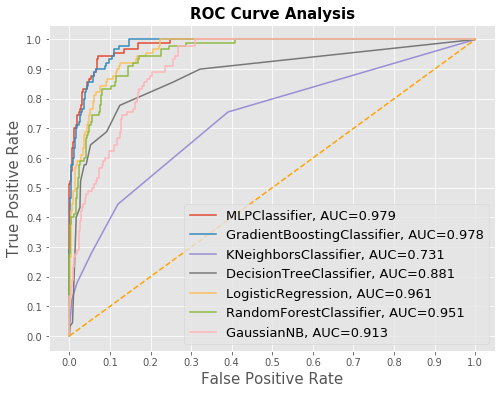

In [54]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

As expected given the analysis of the scores table, the MLP (Neural Netwoks) was the top performing model, signaled by the outermost curve.

### 2.8 Conclusions (Financial Analysis)

The campaign aims at selling a new product to the customer database. To be able to build the predictive model, a pilot campaign was carried out. A sample of 2.500 customers were contacted by mail regarding. </p>
The total cost of the campaign was 4€ per customer, and the revenue was 20€ for each customer who accepted the campaign.

In [55]:
y_pred_total = grid_mlp.predict(x)
tn, fp, fn, tp = confusion_matrix(y,y_pred_total).ravel()
precision=tp/(tp+fp)
print('Confusion Matrix: \n' , confusion_matrix(y,y_pred_total), '\n')

# Correctly Predicted Profit
cost = 2500*4
revenue = tp*20
profit = revenue-cost
print('Cost of contacting 2.500 customers:', cost, '€')
print('Revenue of the predicted model:',revenue, '€')
print('Profit: ',profit, '€ \n')

# Potencial Revenue - Customers incorrectly predicted with 'No Accept' (0), but actually they 'Accepted' (1) 
print('Potencial Revenue:',fn*20, '€')

# Misclassified Revenue - Customers incorrectly predicted with 'Accept' (1), but actually they 'No Accepted' (0) 
print('Misclassified Revenue:',fp*20, '€')

Confusion Matrix: 
 [[2156   16]
 [  94  206]] 

Cost of contacting 2.500 customers: 10000 €
Revenue of the predicted model: 4120 €
Profit:  -5880 € 

Potencial Revenue: 1880 €
Misclassified Revenue: 320 €


According to the previous costs and revenues per customer, we correctly predicted a profit of -4.880€, with a potential revenue of 880€ (15% approximately), related to customers incorrectly predicted with 'No Accept' (0), when they actually  'Accepted' the campaign (1). However, it doesn't have any impact since our misclassified revenue is the same as the former calculated, 880€ (15% approximately).  

The financial assessment of the selected model is based on four pillars:
- Cost
- Revenue
- Profit
- Opportunity Costs

Note however, that the following approach assumes exclusively the predicted data. That is, the costs, revenue and all other metrics are computed on the predicted distribution.

In [56]:
# Predicted Profit

renue_per_customer = 20
cost_per_contact = 4

# The universe of customers within the database
n = 250000

# The total cost corresponds to portion of the universe (Positively Predicted / Universe)
# which was contacted note however, that this portion is 
# determined by the model hence, the model's positive predictions.
tot_cost = n * (tp + fp)/(tp + fp + tn + fn)* cost_per_contact

# The total renue in hand, corresponds to the proportion of the contacted universe
# which truly resulted in a campaign acceptance, times the per success revenue.
tot_revenue = n * tp/(tp + fp + tn + fn) * renue_per_customer
tot_profit = tot_revenue - tot_cost

print('Total Cost:', round(tot_cost, 2), '€')
print('Total Revenue:',round(tot_revenue, 2), '€')
print('Total Profit: ',round(tot_profit, 2), '€')

Total Cost: 89805.83 €
Total Revenue: 416666.67 €
Total Profit:  326860.84 €


The model predicts a profit of <b>396.440,13€</b> when applied to the 250.000 universe, assuming the predictive capability remains the same, i.e., the porportion of correct predictions over the universe and the porportion of positive predictions over the universe remains the same.